In [1]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv("capmetro_UT.csv")
df.head()

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend


In [58]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["Month"] = df["timestamp"].dt.month
df["Year-Month-Day"] = df["timestamp"].dt.strftime("%Y-%m-%d")

In [59]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Average Travel on the Weekend')

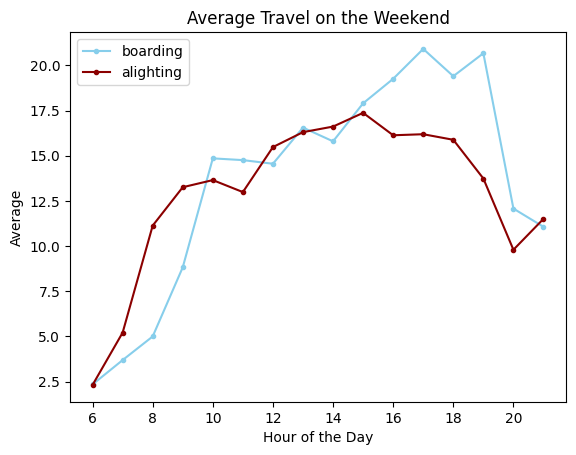

In [60]:
df_weekend = df[df["weekend"] == "weekend"]
df_week = df[df["weekend"] != "weekend"]

df_weekend.groupby("hour_of_day")["boarding"].agg("mean").plot(kind = "line", color = "skyblue", marker = ".")
df_weekend.groupby("hour_of_day")["alighting"].agg("mean").plot(kind = "line", color = "darkred", marker = ".")
plt.legend()
plt.xlabel("Hour of the Day")
plt.ylabel("Average")
plt.title("Average Travel on the Weekend")

Text(0.5, 1.0, 'Average Travel on the Week')

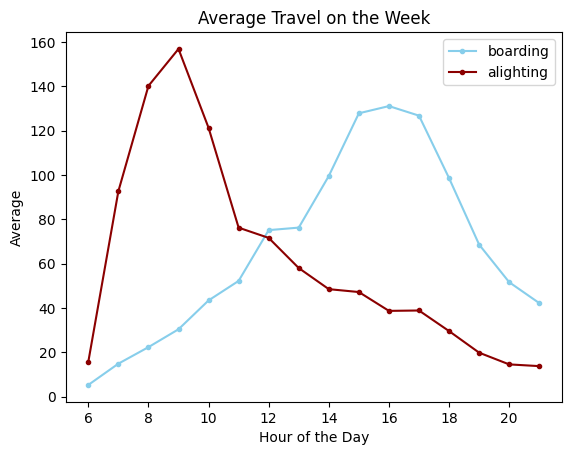

In [61]:
df_week.groupby("hour_of_day")["boarding"].agg("mean").plot(kind = "line", color = "skyblue", marker = ".")
df_week.groupby("hour_of_day")["alighting"].agg("mean").plot(kind = "line", color = "darkred", marker = ".")
plt.legend()
plt.xlabel("Hour of the Day")
plt.ylabel("Average")
plt.title("Average Travel on the Week")

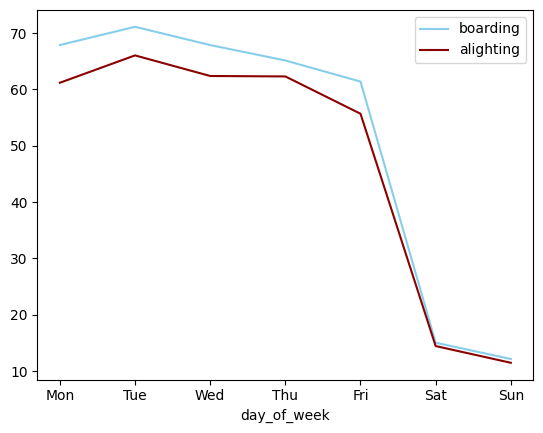

In [62]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df.groupby("day_of_week")["boarding"].agg("mean").reindex(day_order).plot(kind = "line", color = "skyblue")
df.groupby("day_of_week")["alighting"].agg("mean").reindex(day_order).plot(kind = "line", color = "darkred")
plt.legend()

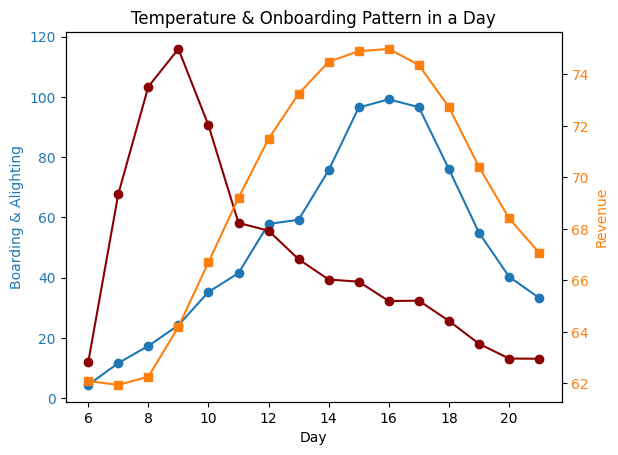

In [70]:
boarding = df.groupby("hour_of_day")["boarding"].agg("mean")
temp = df.groupby("hour_of_day")["temperature"].agg("mean")
alighting = df.groupby("hour_of_day")["alighting"].agg("mean")
fig, ax1 = plt.subplots()

ax1.plot(boarding, marker='o', color='tab:blue')
ax1.plot(alighting, marker = "o", color = "darkred")
ax1.set_xlabel('Day', )
ax1.set_ylabel('Boarding & Alighting', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(temp, marker='s', color='tab:orange')
ax2.set_ylabel('Revenue', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Temperature & Onboarding Pattern in a Day')
plt.xticks(rotation=90)

# Display the plot
plt.show()